## This notebook does preprocessing for external features

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Estimated Rensident Population of sa2 of Victoria preprocess

In [2]:
# check the sheet names for later selecting needed sheet 
xls = pd.ExcelFile('../../data/raw/external_dataset/population_sa2.csv')
sheets = xls.sheet_names
sheets

['Contents',
 'Table 1',
 'Table 2',
 'Table 3',
 'Table 4',
 'Table 5',
 'Explanatory notes']

In [3]:
# find the needed sheet and load data, and then remove none and irrelevant columns and values to get population of sa2 of Victoria
population_sa2 = pd.read_excel('../../data/raw/external_dataset/population_sa2.csv', sheet_name=['Table 1'], header =  None)['Table 1'].drop(range(6))
year = population_sa2.iloc[0].dropna()
header = population_sa2.iloc[1]
header.iloc[10:].update(year)
population_sa2 = population_sa2[3:]
population_sa2.columns = header 
population_sa2 = population_sa2.drop(columns=['2011-2021', '%', 'Population density 2021'])
vic_population_sa2 = population_sa2[population_sa2['S/T name'] == 'Victoria']
vic_population_sa2 = vic_population_sa2.dropna(axis='columns')
vic_population_sa2 = vic_population_sa2.drop(columns = ['SA4 code', 'SA4 name', 'SA3 code', 'SA3 name', 'S/T code', 'GCCSA code', 'GCCSA name'])
vic_population_sa2

7,S/T name,SA2 code,SA2 name,2001,2002,2003,2004,2005,2006,2007,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,Area
651,Victoria,201011001,Alfredton,5756,6092,6293,6480,6648,6761,7034,...,9714,10338,11039,11852,12639,13520,14408,15472,16823,52.7
652,Victoria,201011002,Ballarat,11497,11708,12015,12189,12269,12356,12408,...,12352,12327,12300,12301,12261,12237,12311,12183,12076,12.4
653,Victoria,201011005,Buninyong,5320,5399,5557,5620,5857,6037,6131,...,6984,7082,7191,7311,7407,7413,7452,7369,7232,51.6
654,Victoria,201011006,Delacombe,4154,4225,4371,4465,4704,5041,5206,...,6267,6583,6846,7195,7617,8174,8876,9736,10640,34.2
655,Victoria,201011007,Smythes Creek,3317,3378,3411,3473,3508,3542,3594,...,3914,3945,3966,3990,4002,4040,4109,4148,4213,104.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1168,Victoria,217031476,Otway,3452,3479,3511,3511,3492,3459,3489,...,3497,3519,3538,3556,3633,3707,3797,3905,3978,1505.9
1169,Victoria,217041477,Moyne - East,6718,6704,6676,6643,6638,6652,6606,...,6749,6734,6716,6709,6714,6741,6790,6873,6989,3275.8
1170,Victoria,217041478,Moyne - West,8317,8387,8450,8487,8517,8601,8694,...,9300,9383,9467,9603,9681,9773,9833,9842,9963,2037.8
1171,Victoria,217041479,Warrnambool - North,17053,17449,17726,17937,18172,18528,18877,...,20612,20930,21217,21442,21676,21934,22157,22379,22462,62.4


In [4]:
# get years in the dataset
year = list(year)
year.remove('2011-2021')
year.remove('Area')
year.remove('Population density 2021')
year

[2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015,
 2016,
 2017,
 2018,
 2019,
 2020,
 2021]

In [5]:
# calculate the population density of each sa2 area by the number of people / area of sa2 (km^2)
for i in year:
    vic_population_sa2[f'population_density_of_{i}'] = vic_population_sa2[i]/vic_population_sa2['Area']

vic_population_density_sa2 = vic_population_sa2.drop(columns=year)
vic_population_density_sa2

7,S/T name,SA2 code,SA2 name,Area,population_density_of_2001,population_density_of_2002,population_density_of_2003,population_density_of_2004,population_density_of_2005,population_density_of_2006,...,population_density_of_2012,population_density_of_2013,population_density_of_2014,population_density_of_2015,population_density_of_2016,population_density_of_2017,population_density_of_2018,population_density_of_2019,population_density_of_2020,population_density_of_2021
651,Victoria,201011001,Alfredton,52.7,109.222011,115.597723,119.411765,122.960152,126.148008,128.29222,...,171.916509,184.326376,196.166983,209.468691,224.895636,239.829222,256.54649,273.396584,293.586338,319.222011
652,Victoria,201011002,Ballarat,12.4,927.177419,944.193548,968.951613,982.983871,989.435484,996.451613,...,996.532258,996.129032,994.112903,991.935484,992.016129,988.790323,986.854839,992.822581,982.5,973.870968
653,Victoria,201011005,Buninyong,51.6,103.100775,104.631783,107.693798,108.914729,113.507752,116.996124,...,132.829457,135.348837,137.248062,139.360465,141.686047,143.546512,143.662791,144.418605,142.810078,140.155039
654,Victoria,201011006,Delacombe,34.2,121.461988,123.538012,127.807018,130.555556,137.54386,147.397661,...,176.023392,183.245614,192.48538,200.175439,210.380117,222.719298,239.005848,259.532164,284.678363,311.111111
655,Victoria,201011007,Smythes Creek,104.7,31.680993,32.26361,32.578797,33.170965,33.505253,33.82999,...,36.981853,37.382999,37.679083,37.879656,38.108883,38.223496,38.586437,39.245463,39.617956,40.238777
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1168,Victoria,217031476,Otway,1505.9,2.292317,2.310246,2.331496,2.331496,2.318879,2.296965,...,2.294973,2.322199,2.336809,2.349426,2.361379,2.412511,2.461651,2.521416,2.593134,2.64161
1169,Victoria,217041477,Moyne - East,3275.8,2.050797,2.046523,2.037975,2.027902,2.026375,2.030649,...,2.064839,2.06026,2.055681,2.050186,2.048049,2.049576,2.057818,2.072776,2.098113,2.133525
1170,Victoria,217041478,Moyne - West,2037.8,4.081362,4.115713,4.146629,4.164786,4.179507,4.220728,...,4.498479,4.563745,4.604475,4.645696,4.712435,4.750712,4.795858,4.825302,4.829718,4.889096
1171,Victoria,217041479,Warrnambool - North,62.4,273.285256,279.63141,284.070513,287.451923,291.217949,296.923077,...,324.567308,330.320513,335.416667,340.016026,343.621795,347.371795,351.50641,355.080128,358.637821,359.967949


In [6]:
# output the csv file of population density
vic_population_density_sa2.drop(columns=['Area']).to_csv('../../data/curated/vic_population_density_sa2.csv')

## Total Income of sa2 of Victoria preprocess
Assumption for income: later year will be used, i.e 2012-2013 will be assumed as 2013

In [7]:
# check the sheet names for later selecting needed sheet 
xls = pd.ExcelFile('../../data/raw/external_dataset/income_2015_2019.csv')
sheets = xls.sheet_names
sheets

['Contents', 'Table 1.1', 'Table 1.2', 'Table 1.3', 'Table 1.4', 'Table 1.5']

In [8]:
# find the needed sheet and load data, and then remove none and irrelevant columns and values to get total incomes of sa2 of Victoria
income1519 = pd.read_excel('../../data/raw/external_dataset/income_2015_2019.csv', sheet_name=['Table 1.4'], header =  None)['Table 1.4'].drop(range(6))
persons1519 = income1519 .iloc[:, :7]
income1519 = income1519.iloc[:, 12:17]

# get the data of number of persons(earners) in each sa2
persons_header1519 = persons1519.iloc[0]
persons1519 = persons1519[1:]
persons1519.columns = persons_header1519
i = persons1519.index[persons1519['SA2'] == 'Victoria'].tolist()[0]
j = persons1519.index[persons1519['SA2'] == 'Queensland'].tolist()[0]
persons1519 = persons1519.iloc[i-6:j-7, :]

# get the data of sum incomes in each sa2
income_header1519 = list(income1519.iloc[0])
income1519 = income1519[1:]
income1519.columns = income_header1519
income1519 = income1519.iloc[i-6:j-7, :]

income1519[income_header1519] = income1519[income_header1519].apply(pd.to_numeric, errors='coerce')
persons1519[income_header1519] = persons1519[income_header1519].apply(pd.to_numeric, errors='coerce')

# calculate income per person of each sa2
for i in income_header1519:
    persons1519[i] = income1519[i]/persons1519[i]

persons1519

6,SA2,SA2 NAME,2014-15,2015-16,2016-17,2017-18,2018-19
586,201011001,Alfredton,56373.600964,57746.696785,60026.081134,62315.127415,63668.274127
587,201011002,Ballarat,67216.710660,72754.453378,71895.145248,74671.366381,77875.693878
588,201011003,Ballarat - North,53016.994081,54660.327661,56067.366669,59786.487796,60366.697603
589,201011004,Ballarat - South,45473.451837,46143.213201,47676.111970,49041.036441,50778.316302
590,201011005,Buninyong,58010.968734,58292.425144,60008.747450,61564.815018,63257.766533
...,...,...,...,...,...,...,...
1043,217031476,Otway,40639.888539,42425.576401,44235.906695,44755.438398,46448.133475
1044,217041477,Moyne - East,48626.519794,47031.049570,49103.852024,50652.260496,55572.647880
1045,217041478,Moyne - West,48279.664071,50306.901464,51459.022573,52080.290026,55546.749316
1046,217041479,Warrnambool - North,50513.442675,50938.952292,52089.753663,59811.605637,56098.576195


In [9]:
# find the needed sheet and load data, and then remove none and irrelevant columns and values to get total incomes of sa2 of Victoria
income1214 = pd.read_excel('../../data/raw/external_dataset/income_2012_2018.csv', sheet_name=['Table 1.4'], header =  None)['Table 1.4'].drop(range(6))
persons1214 = income1214.iloc[:, :5]
income1214 = income1214.iloc[:, 16:19]

# get the data of number of persons(earners) in each sa2
persons_header1214 = persons1214.iloc[0]
persons1214 = persons1214[1:]
persons1214.columns = persons_header1214
i = persons1214.index[persons1214['SA2'] == 'Victoria'].tolist()[0]
j = persons1214.index[persons1214['SA2'] == 'Queensland'].tolist()[0]
persons1214 = persons1214.iloc[i-6:j-7, :]

# get the data of sum incomes in each sa2
income_header1214 = list(income1214.iloc[0])
income1214 = income1214[1:]
income1214.columns = income_header1214
income1214 = income1214.iloc[i-6:j-7, :]

income1214[income_header1214] = income1214[income_header1214].apply(pd.to_numeric, errors='coerce')
persons1214[income_header1214] = persons1214[income_header1214].apply(pd.to_numeric, errors='coerce')

# calculate income per person of each sa2
for i in income_header1214:
    persons1214[i] = income1214[i]/persons1214[i]

persons1214

6,SA2,SA2 NAME,2011-12,2012-13,2013-14
586,201011001,Alfredton,51670.073951,52993.212211,54624.783507
587,201011002,Ballarat,61177.132231,63669.220872,65506.668018
588,201011003,Ballarat - North,48946.980038,50871.715079,52023.790882
589,201011004,Ballarat - South,41918.131939,43625.173890,44721.796782
590,201011005,Buninyong,53538.216040,55674.656008,56765.499102
...,...,...,...,...,...
1043,217031476,Otway,39330.688626,36935.722554,39768.884651
1044,217041477,Moyne - East,43776.493154,37883.223483,46721.779160
1045,217041478,Moyne - West,43419.626551,42510.701418,46052.713707
1046,217041479,Warrnambool - North,45988.991412,46933.500648,48440.255857


In [10]:
# combine the data of 2012 - 2014 and data of 2015 - 2019 to a dataframe of 2012 - 2019 income per person of each sa2
income_per_person_sa2 = pd.merge(persons1214, persons1519, left_on='SA2', right_on='SA2')
income_per_person_sa2 = income_per_person_sa2.drop(columns='SA2 NAME_y')
header = ['SA2', 'SA2 NAME', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019']
income_per_person_sa2.columns = header 
income_per_person_sa2 = income_per_person_sa2.dropna()
income_per_person_sa2

,SA2,SA2 NAME,2012,2013,2014,2015,2016,2017,2018,2019
0,201011001,Alfredton,51670.073951,52993.212211,54624.783507,56373.600964,57746.696785,60026.081134,62315.127415,63668.274127
1,201011002,Ballarat,61177.132231,63669.220872,65506.668018,67216.710660,72754.453378,71895.145248,74671.366381,77875.693878
2,201011003,Ballarat - North,48946.980038,50871.715079,52023.790882,53016.994081,54660.327661,56067.366669,59786.487796,60366.697603
3,201011004,Ballarat - South,41918.131939,43625.173890,44721.796782,45473.451837,46143.213201,47676.111970,49041.036441,50778.316302
4,201011005,Buninyong,53538.216040,55674.656008,56765.499102,58010.968734,58292.425144,60008.747450,61564.815018,63257.766533
...,...,...,...,...,...,...,...,...,...,...
457,217031476,Otway,39330.688626,36935.722554,39768.884651,40639.888539,42425.576401,44235.906695,44755.438398,46448.133475
458,217041477,Moyne - East,43776.493154,37883.223483,46721.779160,48626.519794,47031.049570,49103.852024,50652.260496,55572.647880
459,217041478,Moyne - West,43419.626551,42510.701418,46052.713707,48279.664071,50306.901464,51459.022573,52080.290026,55546.749316
460,217041479,Warrnambool - North,45988.991412,46933.500648,48440.255857,50513.442675,50938.952292,52089.753663,59811.605637,56098.576195


## The following cells are used for trying convert 2016 sa2 to 2021 sa2, but they are not used in the final version of coding

Initial, since the income data is based on 2016 sa2, but we plan to use 2021 sa2 for the final analysis, the sa2 code in income data need to be converted to 2021 sa2. According to some reasearch, due to some sa2 2016 regions seperated into several different regions in 2021 sa2, we decided to use convert the sa2 2016 to sa2 2021 by linking the 2016 sa2 region to 2021 sa2 with the majority percentage. Because those regions with majority percentage would more likely to have good region qualities, and therefore those regions could more likely to have similar data from the past.
Refer to "Changes to Mesh Blocks, Statistical Areas Level 1 (SA1s) and Statistical Areas Level 2 (SA2s) mainly reflect population growth, largely on the edge of urban areas."
-- https://www.abs.gov.au/statistics/standards/australian-statistical-geography-standard-asgs-edition-3/jul2021-jun2026/main-structure-and-greater-capital-city-statistical-areas/changes-previous-edition-asgs

"INDIV_TO_REGION_QLTY_INDICATOR

This field describes how well data is likely to be converted to the “TO” region. There are three values associated with the Individual Quality Indicator:

Good – The ABS expects that for this “TO” region the correspondence will convert data to a high degree of accuracy and users can expect the converted data will reflect the actual characteristics of the geographic regions involved."
-- https://www.abs.gov.au/statistics/standards/australian-statistical-geography-standard-asgs-edition-3/jul2021-jun2026/access-and-downloads/correspondences

However, this leads to lots of data missing, therefore, we dicide to just use 2016 sa2 for later data merging.

In [11]:
# 2016 sa2 to 2021 sa2
#sa2_16_21 = pd.read_csv('../../data/raw/external_dataset/sa2_2016_to_2021.csv').iloc[:-2, :6]
#sa2_16_21['SA2_MAINCODE_2016'] = sa2_16_21['SA2_MAINCODE_2016'].astype('int')
#sa2_16_21 = sa2_16_21.groupby('SA2_MAINCODE_2016').apply(lambda x: x.loc[x.RATIO_FROM_TO.idxmax()]).reset_index(drop=True)
#change = sa2_16_21.loc[sa2_16_21['SA2_MAINCODE_2016'].isin(income_per_person_sa2['SA2']), ['SA2_CODE_2021', 'SA2_NAME_2021']]
#income_per_person_sa2.update(change.rename(columns={'SA2_CODE_2021': 'SA2', 'SA2_NAME_2021': 'SA2 NAME'}))

In [12]:
# output csv file of income per person
income_per_person_sa2.to_csv('../../data/curated/income_per_person_sa2.csv')

## Criminal Cases by postcode of Victoria preprocess

In [13]:
# check the sheet names for later selecting needed sheet 
xls = pd.ExcelFile('../../data/raw/external_dataset/criminal_rate.csv')
sheets = xls.sheet_names
sheets

['Contents', 'Table 01', 'Table 02', 'Table 03', 'Table 04', 'Table 05']

In [14]:
# find the needed sheet and load data
crime_case = pd.read_excel('../../data/raw/external_dataset/criminal_rate.csv', sheet_name=['Table 03'], header =  None)['Table 03']
header = crime_case.iloc[0]
crime_case = crime_case[1:]
crime_case.columns = header
crime_case

KeyboardInterrupt: 

In [ ]:
# get the number of each combination of offence division and postcode
Offence_Division = crime_case.groupby(['Offence Division', 'Postcode'],as_index = False)\
                             .agg({\
                        'Offence Count': 'count'
                    })\
                .rename({'Offence Count': 'num'}, axis=1)

Offence_Division

,Offence Division,Postcode,num
0,A Crimes against the person,3000,188
1,A Crimes against the person,3002,142
2,A Crimes against the person,3003,144
3,A Crimes against the person,3004,295
4,A Crimes against the person,3006,287
...,...,...,...
4054,F Other offences,3987,1
4055,F Other offences,3991,1
4056,F Other offences,3992,1
4057,F Other offences,3995,24


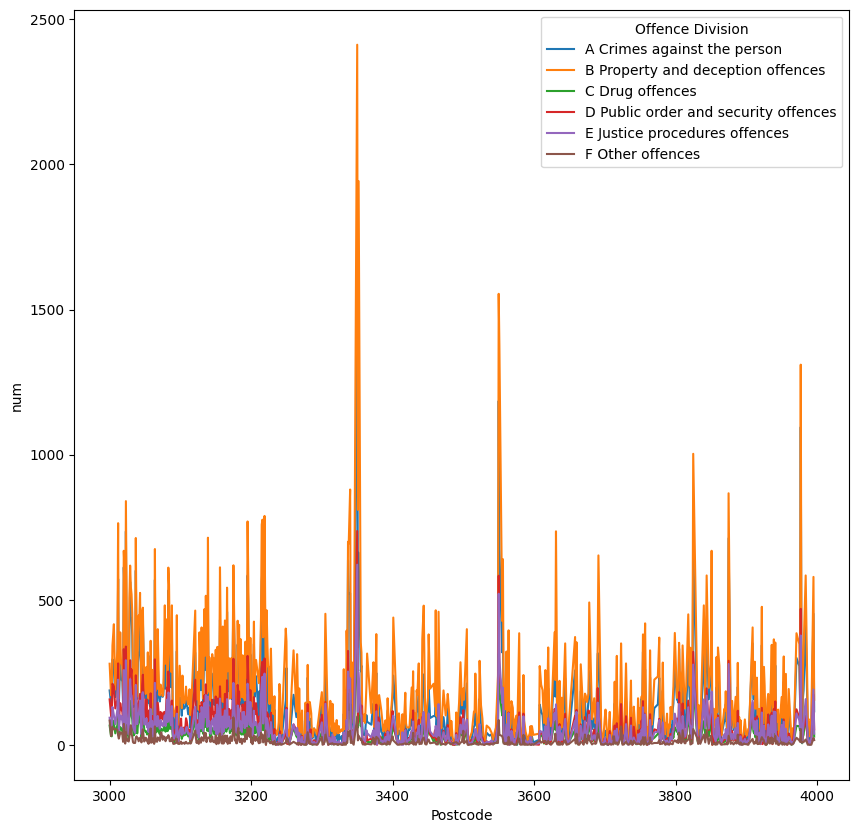

In [ ]:
# visualize the number of each combination of offence division and postcode
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1, 1, 1)

sns.lineplot(x="Postcode", y="num",hue="Offence Division", data=Offence_Division)

plt.show()

In [ ]:
# get the number of each combination of offence subdivision and postcode
Offence_Subdivision = crime_case.groupby(['Offence Subdivision', 'Postcode'],as_index = False)\
                             .agg({\
                        'Offence Count': 'count'
                    })\
                .rename({'Offence Count': 'num'}, axis=1)

Offence_Subdivision

,Offence Subdivision,Postcode,num
0,A20 Assault and related offences,3000,58
1,A20 Assault and related offences,3002,50
2,A20 Assault and related offences,3003,50
3,A20 Assault and related offences,3004,99
4,A20 Assault and related offences,3006,114
...,...,...,...
13524,Other crimes against the person,3990,1
13525,Other crimes against the person,3991,5
13526,Other crimes against the person,3992,7
13527,Other crimes against the person,3995,48


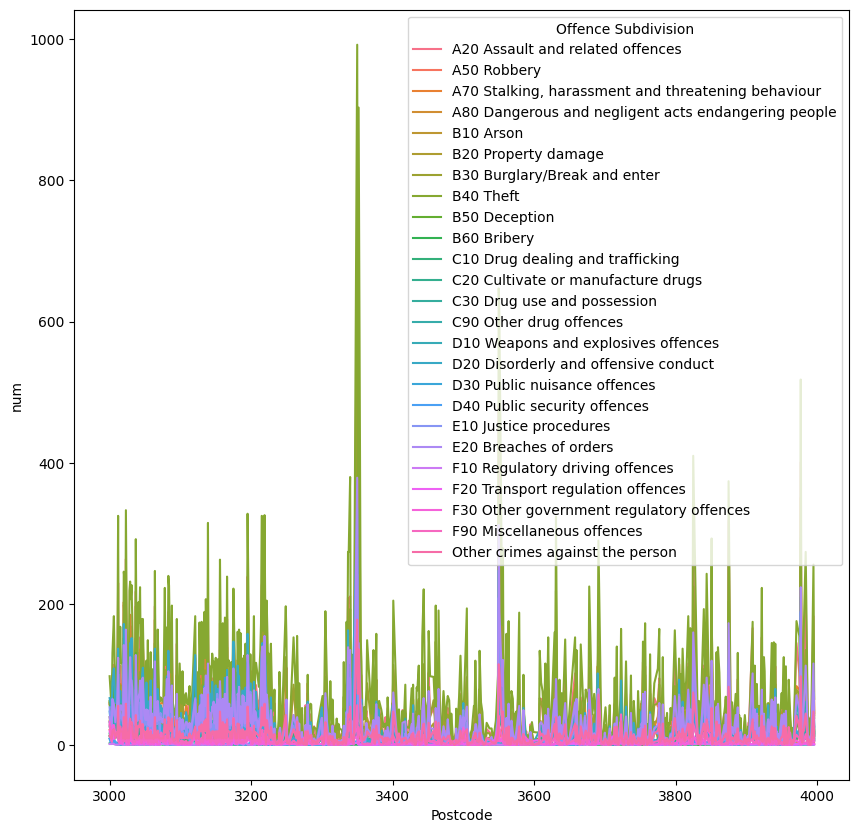

In [ ]:
# visualize the number of each combination of offence subdivision and postcode
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1, 1, 1)

sns.lineplot(x="Postcode", y="num",hue="Offence Subdivision", data=Offence_Subdivision)

plt.show()

In [ ]:
# get the number of each combination of offence subgroup and postcode
Offence_Subgroup = crime_case.groupby(['Offence Subgroup', 'Postcode'],as_index = False)\
                             .agg({\
                        'Offence Count': 'count'
                    })\
                .rename({'Offence Count': 'num'}, axis=1)

Offence_Subgroup

,Offence Subgroup,Postcode,num
0,A211 FV Serious assault,3000,10
1,A211 FV Serious assault,3002,10
2,A211 FV Serious assault,3003,10
3,A211 FV Serious assault,3004,20
4,A211 FV Serious assault,3006,19
...,...,...,...
38453,Other crimes against the person,3990,1
38454,Other crimes against the person,3991,5
38455,Other crimes against the person,3992,7
38456,Other crimes against the person,3995,48


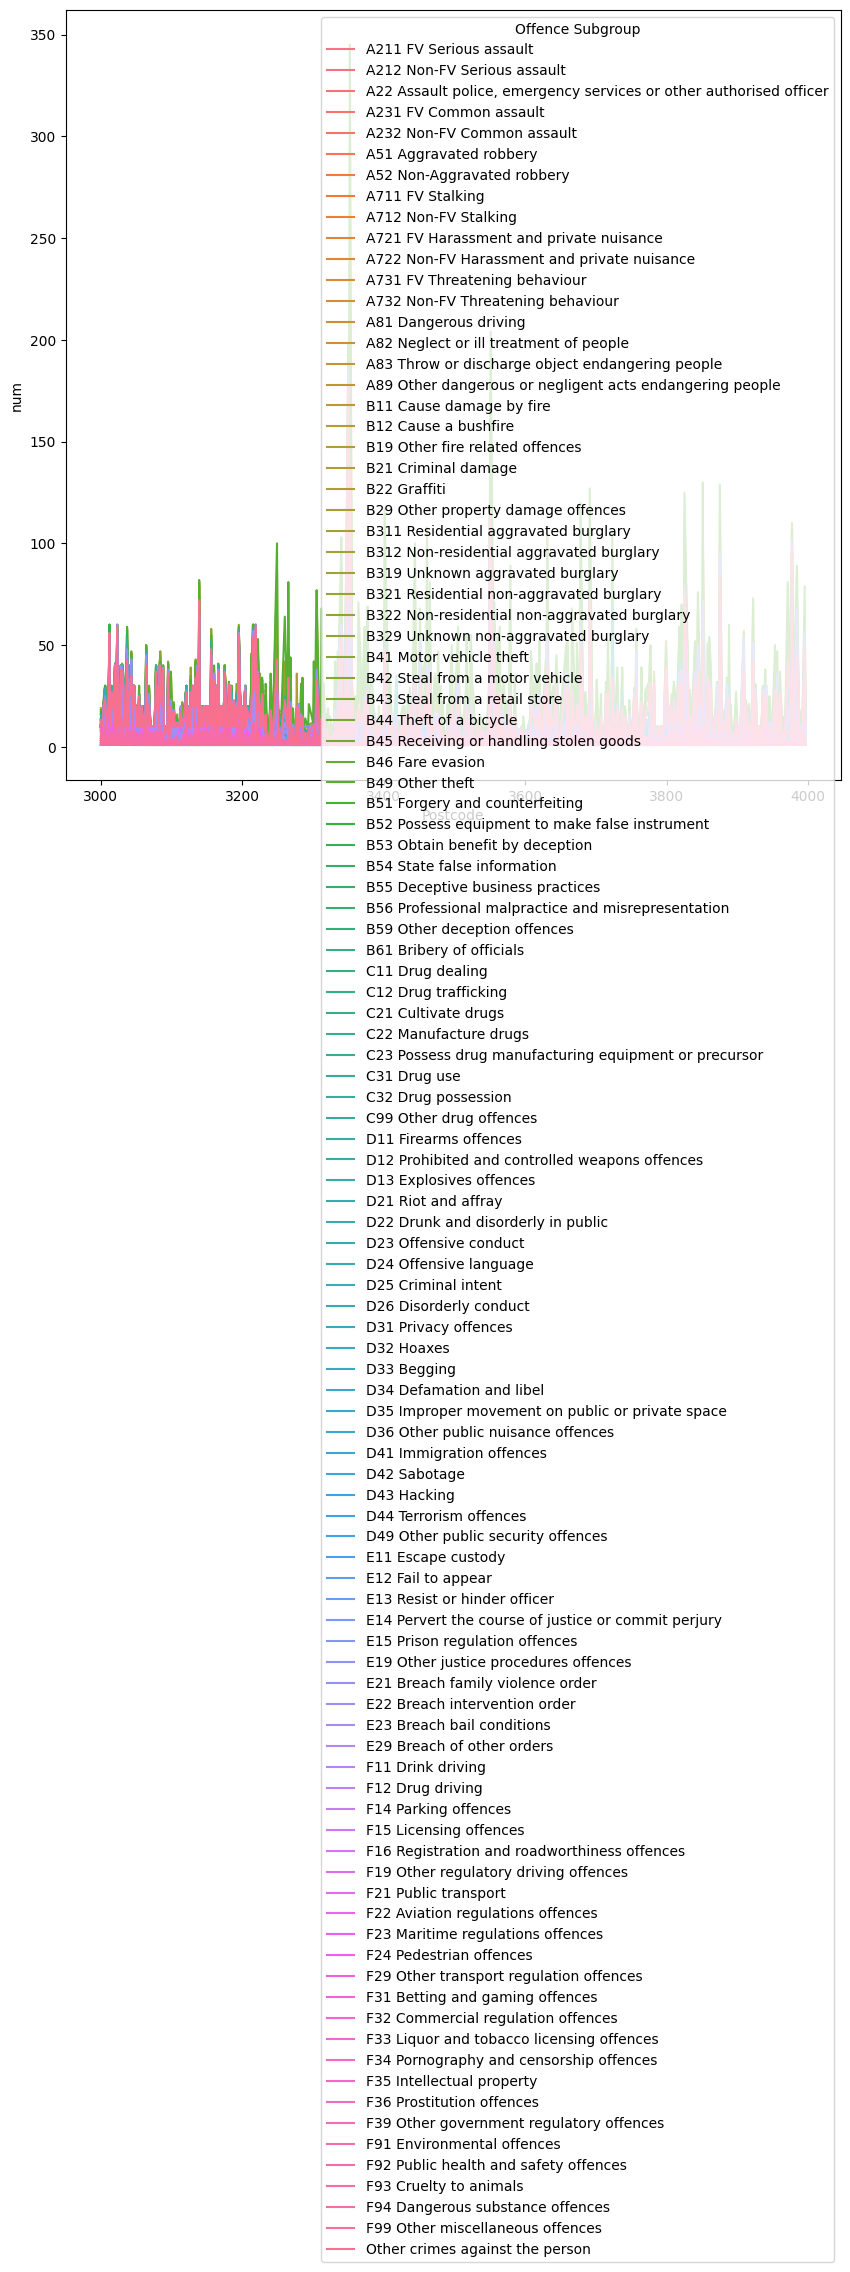

In [ ]:
# visualize the number of each combination of offence subgroup and postcode
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1, 1, 1)

sns.lineplot(x="Postcode", y="num",hue="Offence Subgroup", data=Offence_Subgroup)

plt.show()

In [ ]:
# get the number of each combination of offence subgroup and postcode
crime_case_suburb = crime_case.drop(columns=['Offence Division', 'Offence Subdivision', 'Offence Subgroup'])
crime_case_suburb = crime_case_suburb.groupby(['Year', 'Postcode'],as_index = False)\
                             .agg({\
                        'Offence Count': 'sum'
                    })

crime_case_suburb

,Year,Postcode,Offence Count
0,2013,3000,17553
1,2013,3002,933
2,2013,3003,837
3,2013,3004,5305
4,2013,3006,2433
...,...,...,...
6889,2022,3990,2
6890,2022,3991,75
6891,2022,3992,94
6892,2022,3995,1179


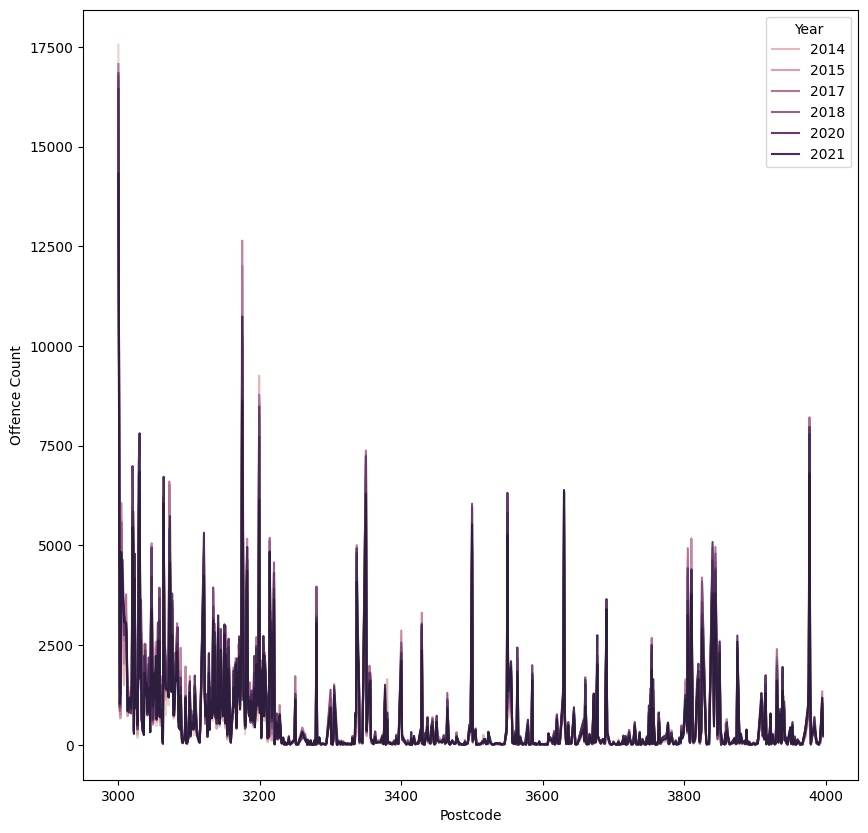

In [ ]:
# visualize the number of each combination of offence subgroup and postcode
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1, 1, 1)

sns.lineplot(x="Postcode", y="Offence Count",hue="Year", data=crime_case_suburb)

plt.show()

In [ ]:
# output csv file of crime cases by postcode and year
crime_case_suburb.to_csv('../../data/curated/crime_cases.csv')

## GDP and saving rate by year preprocess

In [ ]:
# check the sheet names for later selecting needed sheet 
xls = pd.ExcelFile('../../data/raw/external_dataset/GDP.csv')
sheets = xls.sheet_names
sheets

['Index', 'Data1', 'Inquiries']

In [ ]:
# find the needed sheet and load data, and then remove none and irrelevant columns and values to get gdp (current prices) by year of Australia
gdp = pd.read_excel('../../data/raw/external_dataset/GDP.csv', sheet_name=['Data1'], header =  None)['Data1']
header = gdp.iloc[0]
header = list(header)
header[0] = 'date'
gdp = gdp[1:]
gdp.columns = header
gdp = gdp[['date', 'GROSS DOMESTIC PRODUCT: Current prices ;']]
gdp.columns = ['date', 'GDP_current_prices_Millions']
gdp = gdp.iloc[9:, :]
gdp['year'] = pd.to_datetime(gdp['date']).dt.year
gdp = gdp.drop(columns=['date'])
gdp.rename({'GDP_current_prices_Millions': 'gdp(USD Millioins)'}, axis=1, inplace=True)
gdp

,gdp(USD Millioins),year
10,16614,1960
11,17575,1961
12,17789,1962
13,19233,1963
14,21252,1964
...,...,...
67,1759314,2017
68,1842946,2018
69,1946228,2019
70,1980866,2020


In [ ]:
# load data, and then remove none and irrelevant columns and values to get saving rate by year of Australia
saving_rate = pd.read_csv('../../data/raw/external_dataset/saving_rate.csv')
saving_rate = saving_rate.loc[saving_rate['LOCATION']=='AUS']
saving_rate.rename({'Value': 'saving_rate(% of GDP)'}, axis=1, inplace=True)
COL = ['TIME', 'saving_rate(% of GDP)']
final = gdp.merge(saving_rate[COL], left_on=['year'], right_on=['TIME']).drop(columns=['TIME'])
final = final[["year", "gdp(USD Millioins)", "saving_rate(% of GDP)"]]
final

NameError: name 'pd' is not defined

In [ ]:
# output csv file of gdp and saving rate by year
final.to_csv('../../data/curated/gdp_with_saving_rate.csv')